[0, 1, 2, 3]


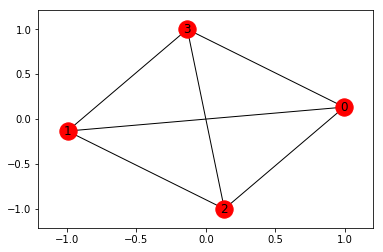

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

from pyquil.api import get_qc

# ideal_qc = get_qc('4q-qvm', noisy=False)
noisy_qc = get_qc("Aspen-3-7Q-A")

qubits = noisy_qc.qubits()
print(qubits)
graph = noisy_qc.qubit_topology()
nx.draw_networkx(graph, with_labels=True)

## Import and setup logging for info on progress.

In [3]:
from forest_benchmarking.quantum_volume import *

import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)
show_progress_bar = True

from time import time

In [4]:
start = time()
df = quantum_volume_dataframe(qubits=[1,2,3], num_circuits=300, depths=[2,3])
df = add_circuits_to_dataframe(df)
df, data_acq_time = acquire_qv_data(df, ideal_qc, num_shots=500, use_active_reset=False)
print(data_acq_time)
final_df1, total_sim_time = acquire_heavy_hitters(df)
print(total_sim_time)
end = time()
print(end - start)

probs_and_errors = get_results_by_depth(final_df1)
print(probs_and_errors)

135.61787796020508
0.501314640045166
136.28105354309082
{2: (0.7984, 0.7520739900271997), 3: (0.8514666666666667, 0.8104022973225549)}


In [4]:
start = time()
df = quantum_volume_dataframe(qubits=[1,2,3], num_circuits=300, depths=[2,3])
df = add_circuits_to_dataframe(df)
df, data_acq_time = acquire_qv_data(df, noisy_qc, num_shots=500, use_active_reset=True)
print(data_acq_time)
final_df2, total_sim_time = acquire_heavy_hitters(df)
print(total_sim_time)
end = time()
print(end - start)

probs_and_errors = get_results_by_depth(final_df2)
print(probs_and_errors)

138.66465878486633
0.5087440013885498
139.33286547660828
{2: (0.5044533333333333, 0.4467205964824244), 3: (0.84524, 0.8034772825916064)}


In [18]:
df = quantum_volume_dataframe(qubits=[1, 2, 3], num_circuits=200, depths=[2,3])

In [19]:
df = add_circuits_to_dataframe(df)

In [20]:
df, data_acq_time = acquire_qv_data(df, noisy_qc, num_shots=100, use_active_reset = False)
print(data_acq_time)

102.20563054084778


In [21]:
df, total_sim_time = acquire_heavy_hitters(df)
print(total_sim_time)

0.11663532257080078


In [22]:
prob_and_errors = get_results_by_depth(df)
print(prob_and_errors)

{2: (0.54015, 0.4696676649790886), 3: (0.7777, 0.7188981785996386)}


In [23]:
print(df)

        Qubits  Depth                                            Circuit  \
0       {1, 2}      2  ([[1, 0], [1, 0]], [[[[ 0.08354564-0.55237344j...   
1       {1, 2}      2  ([[1, 0], [1, 0]], [[[[ 0.45098557-0.19330812j...   
2       {1, 2}      2  ([[0, 1], [1, 0]], [[[[ 0.18817431-0.35541579j...   
3       {1, 2}      2  ([[0, 1], [0, 1]], [[[[-0.30056824+0.09468738j...   
4       {1, 2}      2  ([[1, 0], [1, 0]], [[[[ 0.01248778+0.58819779j...   
5       {1, 2}      2  ([[1, 0], [0, 1]], [[[[-0.04556996-0.04822739j...   
6       {1, 2}      2  ([[0, 1], [1, 0]], [[[[-0.12018575-0.53868308j...   
7       {1, 2}      2  ([[1, 0], [0, 1]], [[[[ 0.0343568 -0.20436334j...   
8       {1, 2}      2  ([[1, 0], [0, 1]], [[[[ 0.42441048+0.28562384j...   
9       {1, 2}      2  ([[0, 1], [1, 0]], [[[[-0.21779237-0.33540124j...   
10      {1, 2}      2  ([[1, 0], [1, 0]], [[[[ 0.21324399+0.14784112j...   
11      {1, 2}      2  ([[0, 1], [1, 0]], [[[[-0.40989358-0.53365489j...   
12      {1, 

## Replicate FIG2. of [QVol]  (See forest_qcvv.quantum_volume for ref)

This is SLOW--it takes about 4 minutes.

In [5]:
ideal_outcomes = measure_quantum_volume(ideal_qc, num_circuits=200, show_progress_bar=show_progress_bar)
print(ideal_outcomes)

100%|██████████| 200/200 [02:57<00:00,  1.13it/s]

[(2, 0.794665, 0.7375383796247318, True), (3, 0.848665, 0.7979831062360531, True), (4, 0.841005, 0.7892912513493752, True)]


In [ ]:
ideal_outcomes = [(2, 0.794665, 0.7375383796247318, True), (3, 0.848665, 0.7979831062360531, True), (4, 0.841005, 0.7892912513493752, True)]

## Now with noise

This is SLOW--it takes about 5 minutes, even with half the number of shots from above.

In [ ]:
noisy_outcomes = measure_quantum_volume(noisy_qc, num_circuits=200, num_shots=500, show_progress_bar=show_progress_bar)

In [ ]:
depths = np.arange(2, 5)
ideal_probs = [val[1] for val in ideal_outcomes]
noisy_probs = [val[1] for val in noisy_outcomes]

plt.axhline(.5 + np.log(2)/2, color='b', ls='--', label='ideal asymptote')
plt.axhline(2/3, color='black', ls=':', label='achievable threshold')
plt.scatter(np.array(depths) - .1, ideal_probs, color='b', label='ideal simulation')
plt.scatter(depths, noisy_probs, color='r', label='noisy simulation')
plt.ylabel("est. heavy output probability h_d")
plt.xlabel("width/depth of model circuit m=d")
plt.ylim(.4,1.0)
plt.xlim(1.8, 4.2)
plt.xticks(depths)
plt.legend(loc='lower left')
plt.show()

## Try a different topology

In [ ]:
n = 4
path_graph = nx.path_graph(n)
loop_graph = nx.cycle_graph(n)
four_pointed_star = nx.star_graph(n)

In [ ]:
nx.draw_networkx(path_graph, with_labels=True)

In [ ]:
nx.draw_networkx(loop_graph, with_labels=True)

In [ ]:
nx.draw_networkx(four_pointed_star, with_labels=True)

In [ ]:
from pyquil.api._quantum_computer import _get_qvm_with_topology
path_qc = _get_qvm_with_topology(name='path', topology=path_graph, noisy=True)

In [ ]:
path_outcomes = measure_quantum_volume(path_qc, num_circuits=200, num_shots=500, show_progress_bar=show_progress_bar)

## Compare to noisy complete topology

In [ ]:
depths = np.arange(2, 5)
ideal_probs = [val[1] for val in ideal_outcomes]
noisy_probs = [val[1] for val in noisy_outcomes]
path_probs = [val[1] for val in path_outcomes]

plt.axhline(.5 + np.log(2)/2, color='b', ls='--', label='ideal asymptote')
plt.axhline(2/3, color='grey', ls=':', label='achievable threshold')
plt.scatter(np.array(depths) - .1, ideal_probs, color='b', label='ideal simulation')
plt.scatter(depths, noisy_probs, color='r', label='noisy complete simulation')
plt.scatter(depths, path_probs, color='black', label='noisy path simulation')
plt.ylabel("est. heavy output probability h_d")
plt.xlabel("width/depth of model circuit m=d")
plt.ylim(.4,1.0)
plt.xlim(1.8, 4.2)
plt.xticks(depths)
plt.legend(loc='lower left')
plt.show()